<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/Demographic_event_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demographic event train

In [2]:
df1 = pd.read_csv('/content/demographics_event_train.csv')
df1.head()

,Unnamed: 0,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,1,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban
1,2,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural
2,4,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban
3,5,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban
4,6,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban


In [3]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df1.head()

,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban
1,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural
2,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban
3,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban
4,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban


In [4]:
df1.shape

(133252, 5)

In [5]:
df1.isnull().sum()

Internalpatientid    0
Age at update        0
Event date           0
Marital status       0
Ruca category        0
dtype: int64

In [6]:
df1.describe()

,Internalpatientid,Age at update
count,133252.000000,133252.000000
mean,84418.709610,77.170080
std,48774.184479,10.875653
min,1.000000,20.842028
25%,42206.750000,70.249313
50%,84381.500000,77.517270
75%,126615.250000,85.232575
max,169064.000000,113.615599


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133252 entries, 0 to 133251
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Internalpatientid  133252 non-null  int64  
 1   Age at update      133252 non-null  float64
 2   Event date         133252 non-null  object 
 3   Marital status     133252 non-null  object 
 4   Ruca category      133252 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [8]:
print(df1.nunique())

Internalpatientid    133252
Age at update        133251
Event date           133242
Marital status            8
Ruca category             4
dtype: int64


In [9]:
print(df1['Age at update'].min())
print(df1['Age at update'].max())
print(df1['Age at update'].mean())

20.84202779044434
113.6155990968739
77.17008045257633


# Plot age distribution

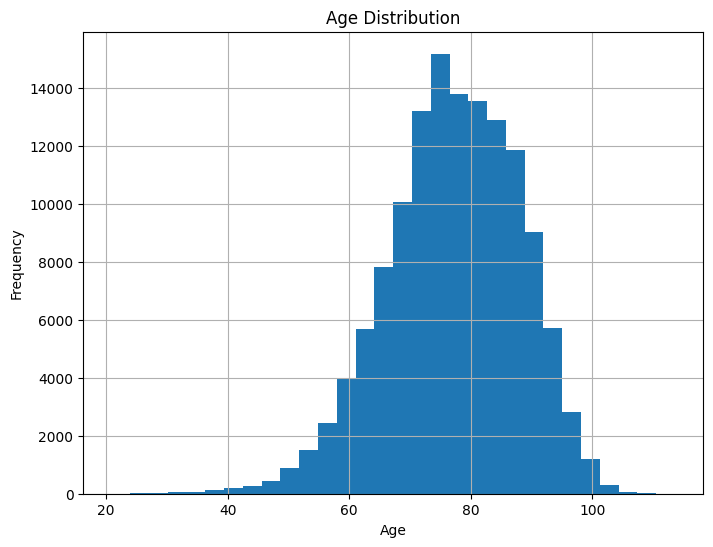

In [10]:
plt.figure(figsize=(8,6))
df1['Age at update'].hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [11]:
df1['Marital status'].value_counts()

Married                     73020
Divorced                    26856
Widowed                     19378
Never married                9352
Separated                    3708
Unknown                       534
Not specified (no value)      286
Single                        118
Name: Marital status, dtype: int64

# Plot marital status distribtution

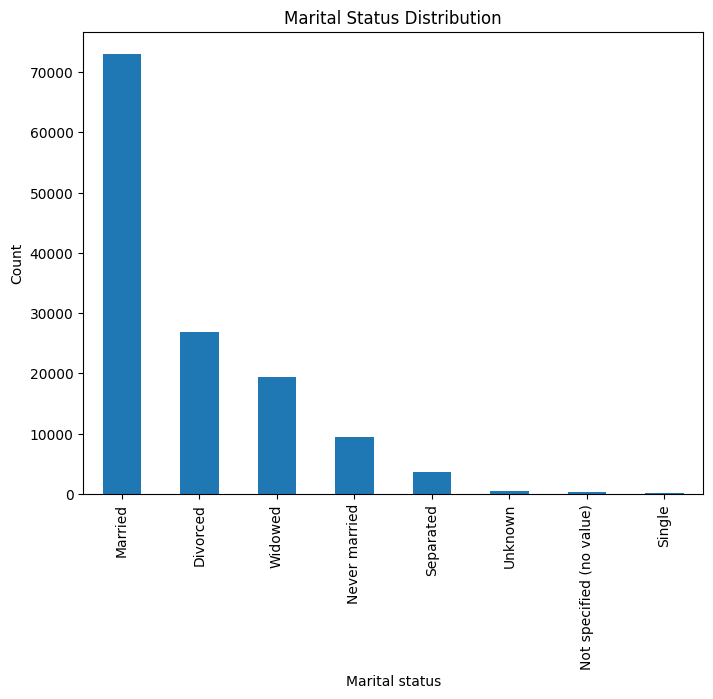

In [12]:
plt.figure(figsize=(8,6))
marital_counts = df1['Marital status'].value_counts()
marital_counts.plot(kind = 'bar')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

In [13]:
df1['Ruca category'].value_counts()

Urban            84092
Rural            46614
Highly rural      2034
Not specified      512
Name: Ruca category, dtype: int64

# Plot rural category distribution

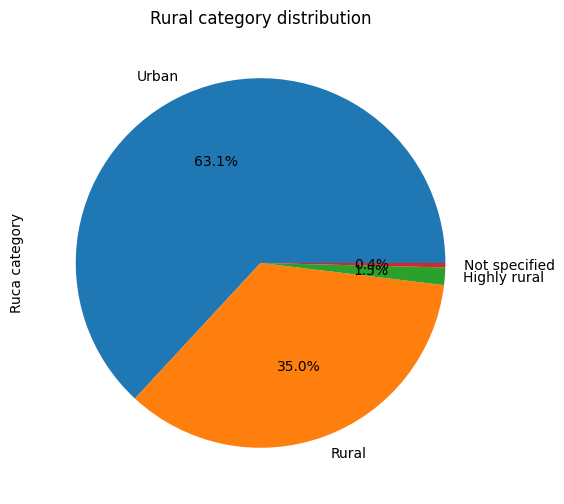

In [14]:
plt.figure(figsize=(8,6))
rural_counts = df1['Ruca category'].value_counts()
rural_counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Rural category distribution')
plt.show()

In [16]:
df1.duplicated().sum()

0

In [29]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df1.duplicated('Internalpatientid')

In [32]:
# check for duplicated values in the Internalpatientid column

if duplicate.any():
  print("Duplicates found in the 'Internalpatientid' column")
else:
  print("No Duplicates found in the 'Internalpatientid' column")

No Duplicates found in the 'Internalpatientid' column


In [21]:
death_file = pd.read_csv('/content/death_train.csv')
death_file.head()

,Unnamed: 0,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10.0
1,1,100037,75.241135,2008-10-16 15:14:26.0
2,2,100045,85.399403,2019-01-26 11:33:52.0
3,3,100095,84.136551,2004-08-10 21:49:35.0
4,6,10013,68.372126,2007-06-11 00:17:06.0


In [22]:
death_file = death_file.drop('Unnamed: 0', axis = 1)
death_file.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10.0
1,100037,75.241135,2008-10-16 15:14:26.0
2,100045,85.399403,2019-01-26 11:33:52.0
3,100095,84.136551,2004-08-10 21:49:35.0
4,10013,68.372126,2007-06-11 00:17:06.0


In [52]:
death_file.shape

(97284, 4)

In [23]:
death_file['death'] = 1
death_file.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10.0,1
1,100037,75.241135,2008-10-16 15:14:26.0,1
2,100045,85.399403,2019-01-26 11:33:52.0,1
3,100095,84.136551,2004-08-10 21:49:35.0,1
4,10013,68.372126,2007-06-11 00:17:06.0,1


In [24]:
merge_demographic_event_death= pd.merge(df1, death_file, how='left',on='Internalpatientid')

In [26]:
merge_demographic_event_death.head()

,Internalpatientid,Age at update,Event date,Marital status,Ruca category,Age at death,Death date,death
0,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban,NaN,NaN,NaN
1,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural,91.375202,2008-02-13 15:16:17.0,1.0
2,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban,72.205323,2002-12-12 01:05:49.0,1.0
3,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban,NaN,NaN,NaN
4,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban,NaN,NaN,NaN


In [27]:
merge_demographic_event_death['death'] = merge_demographic_event_death['death'].fillna(0.0)

In [28]:
merge_demographic_event_death

,Internalpatientid,Age at update,Event date,Marital status,Ruca category,Age at death,Death date,death
0,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban,NaN,NaN,0.0
1,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural,91.375202,2008-02-13 15:16:17.0,1.0
2,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban,72.205323,2002-12-12 01:05:49.0,1.0
3,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban,NaN,NaN,0.0
4,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
133247,99898,92.376313,2014-05-12 13:01:07.0,Married,Urban,85.657543,2007-08-21 19:58:13.0,1.0
133248,9995,79.974938,2011-07-08 20:09:29.0,Married,Rural,79.244757,2010-10-14 23:00:46.0,1.0
133249,99950,77.154395,2005-12-14 22:21:25.0,Married,Urban,73.855918,2002-08-27 08:06:58.0,1.0
133250,9998,62.324623,2011-02-23 15:35:32.0,Divorced,Urban,63.490641,2012-04-24 19:54:17.0,1.0


In [37]:
bivariate_analysis1 = pd.crosstab(merge_demographic_event_death['Ruca category'],merge_demographic_event_death['death'])
print(bivariate_analysis1 )

death            0.0    1.0
Ruca category              
Highly rural     497   1537
Not specified    281    231
Rural          12419  34195
Urban          22771  61321


In [43]:
#calculate the percentage within each rural category

percentage_bivariate_analysis1 = bivariate_analysis1.div(bivariate_analysis1.sum(axis = 1), axis = 0)*100

<Figure size 1000x600 with 0 Axes>

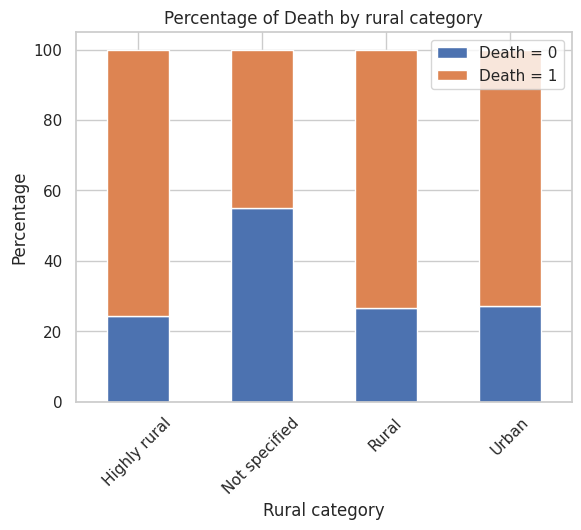

In [45]:
# Plot the stacked bar chart

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
percentage_bivariate_analysis1.plot(kind='bar',stacked = True)
plt.xlabel("Rural category")
plt.ylabel("Percentage")
plt.title("Percentage of Death by rural category")
plt.legend(["Death = 0", "Death = 1"])
plt.xticks(rotation = 45)
plt.show()

In [38]:
bivariate_analysis2 = pd.crosstab(merge_demographic_event_death['Marital status'],merge_demographic_event_death['death'])
print(bivariate_analysis2)

death                       0.0    1.0
Marital status                        
Divorced                   8686  18170
Married                   19721  53299
Never married              3243   6109
Not specified (no value)     87    199
Separated                  1225   2483
Single                       30     88
Unknown                     193    341
Widowed                    2783  16595


In [48]:
#calculate the percentage within each marital status category
percentage_bivariate_analysis2 = bivariate_analysis2.div(bivariate_analysis2.sum(axis = 1), axis = 0)*100

<Figure size 1000x600 with 0 Axes>

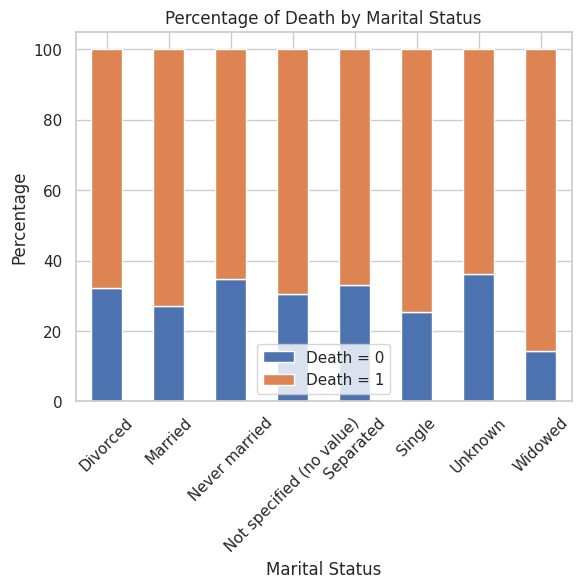

In [49]:
# Plot the stacked bar chart

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
percentage_bivariate_analysis2.plot(kind='bar',stacked = True)
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
plt.title("Percentage of Death by Marital Status")
plt.legend(["Death = 0", "Death = 1"])
plt.xticks(rotation = 45)
plt.show()

In [51]:
merge_demographic_event_death.isnull().sum()

Internalpatientid        0
Age at update            0
Event date               0
Marital status           0
Ruca category            0
Age at death         35968
Death date           35968
death                    0
dtype: int64